In [1]:
import os
from utils.configuration import *
from sklearn.model_selection import train_test_split

In [2]:
experiment_name = "api_ordinal_simple"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [3]:
setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists/home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/configuration.json


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate synthetic data for logistic regression
X, y = make_classification(
    n_samples=100_000,      # number of samples
    n_features=1,       # one predictor
    n_informative=1,    # the predictor is informative
    n_redundant=0,      # no redundant features
    n_clusters_per_class=1,
    class_sep=1.5,      # separation between classes
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    random_state=42
)

# Convert to DataFrame for convenience
df = pd.DataFrame({'x': X.flatten(), 'y': y})

# Save or inspect
print(df.head())


          x  y
0 -1.512619  0
1  1.282712  1
2 -1.384226  0
3 -0.850683  0
4 -2.106546  0


In [5]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [6]:
data_type={'x':'continous','y':'ordinal_Xc_Yo'}
data_type

{'x': 'continous', 'y': 'ordinal_Xc_Yo'}

In [7]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
x                    | continous       | continuous [c]                 | continuous [c]                
y                    | ordinal_Xc_Yo   | continuous [c]                 | ordinal    [0,…,K]            
---------------------------------------------------------------------------------------------------------
Configuration updated successfully.


/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


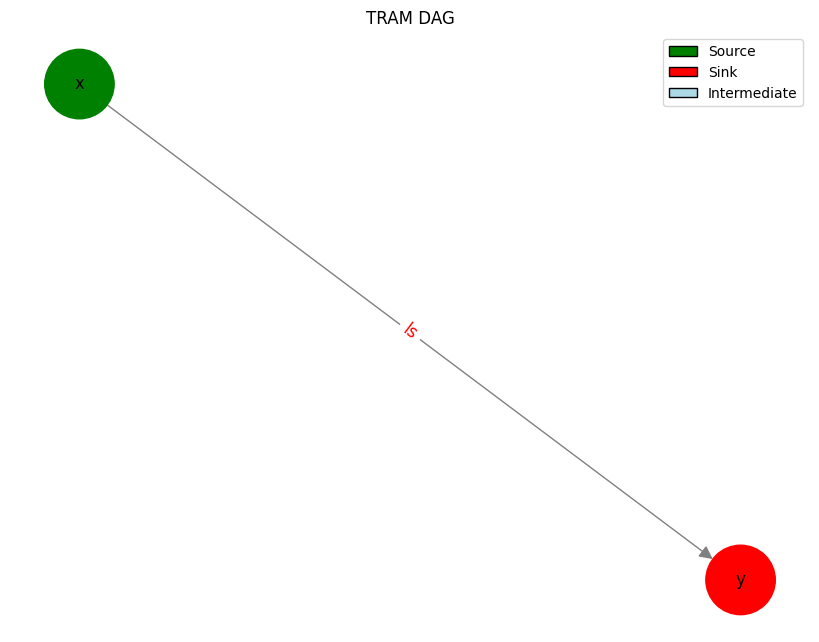

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

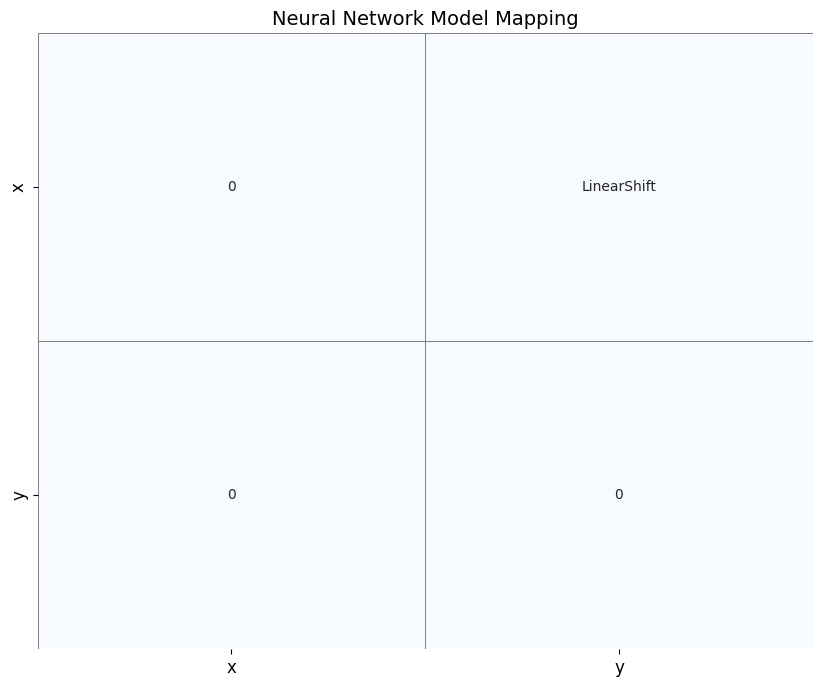

In [9]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [10]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [11]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 
# 1m52s

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'x' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':               x  y
75220 -0.968245  0
48955  1.982983  1
44966 -2.538469  0
13568 -1.579815  0
92727 -0.839440  0
...         ... ..
6265   1.353532  1
54886 -1.414013  0
76820  2.055308  1
860   -0.799310  0
15795  1.214288  1

[80000 rows x 2 columns]}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Wrote DataFrame to temporary CSV: temp/initial_data_1761287248.csv
[DEBUG] R script written to: /tmp/tmpml8j_fqn.R
[DEBUG] R code:
 
library(MASS)
library(tram)
library(readr)

data <- read_csv("temp/initial_data_1761287248.csv")
model <- Colr(`x` ~ 1, data=data, order=19)
cat(model$theta, sep="\n")

[DEBUG] Rscript succeeded
[DEBUG] STDOUT:
 -2.248649
-1.641235
-0.8566284
-0.2577261
-0.2577261
-0.2577261
1.595423
1.848693
1.848693
1.84

In [20]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-2,
             epochs=200,batch_size=10_000,
             verbose=True,debug=False,
             device=device,
             save_linear_shifts=True,
             save_simple_intercepts=True,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

#30 eps 1m 49s seq mode from start 1000 bs
#30 eps 2m 27s parllel multiprocessing mode from start 1000 bs
# 200 eps 9m 30s seq mode from start 1000 bs

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/min_max_scaling.json
[INFO] Training 2 nodes (sequential) on cpu

[INFO] Training node 'x' for 200 epochs on cpu (pid=1243602)
[INFO] Existing model found. Loading weights and history from LAST model...

===== Epoch 101/200 =====


[INFO] Saved simple intercept weights for epoch 101 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/simple_intercepts_all_epochs.json
[INFO] Saved new best model.
[INFO] Epoch 101: Train NLL=1.6026 | Val NLL=1.5982 | Time=1.10s

===== Epoch 102/200 =====
[INFO] Saved simple intercept weights for epoch 102 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/simple_intercepts_all_epochs.json
[INFO] Saved new best model.
[INFO] Epoch 102: Train NLL=1.5903 | Val NLL=1.5860 | Time=1.24s

===== Epoch 103/200 =====
[INFO] Saved simple intercept weights for epoch 103 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/simple_intercepts_all_epochs.json
[INFO] Saved new best model.
[INFO] Epoch 103: Train NLL=1.5782 | Val NLL=1.5741 | Time=0.98s

===== Epoch 104/200 =====
[INFO] Saved simple intercept weights for epoch 104 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/simple_intercepts_all_epochs.json
[INFO] Saved new best model.
[INFO] Epoch

[WARNING] No linear shift history found for node 'x' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/linear_shifts_all_epochs.json


/home/bule/TramDag/utils/tramdag.py:1595: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


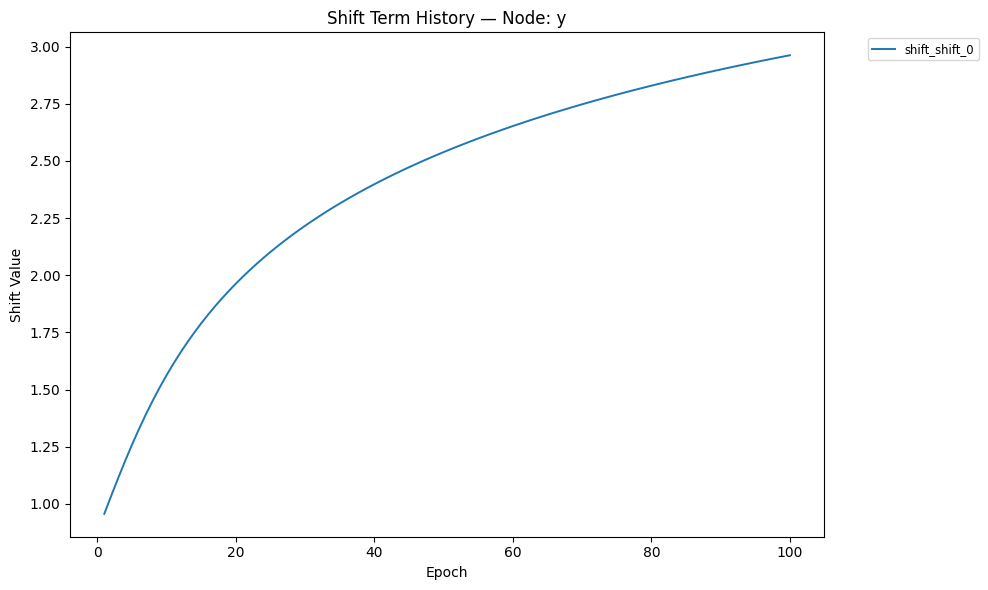

In [13]:
td_model.plot_shift_histories()

/home/bule/TramDag/utils/tramdag.py:1652: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(extract_scalar)


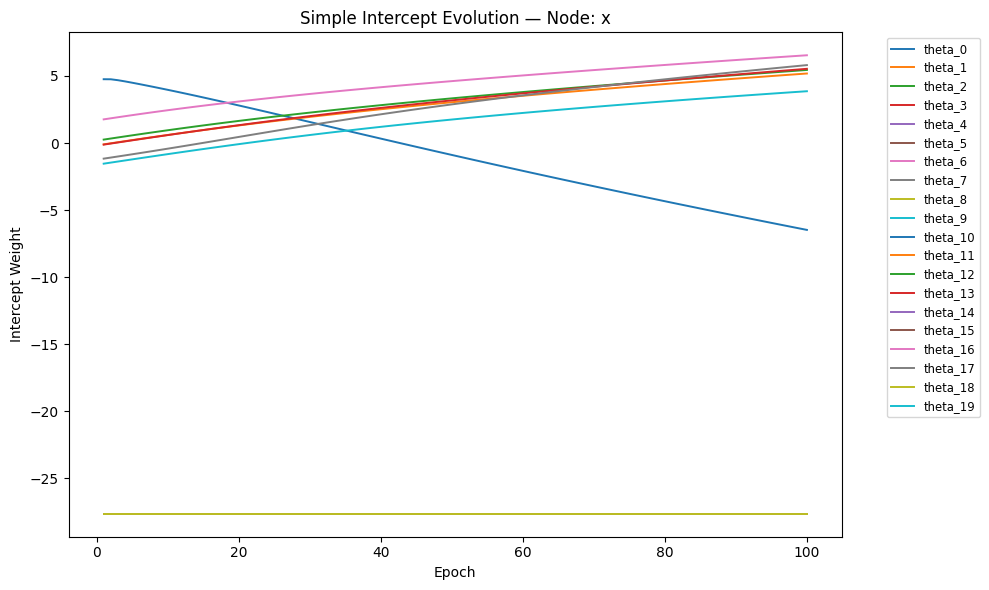

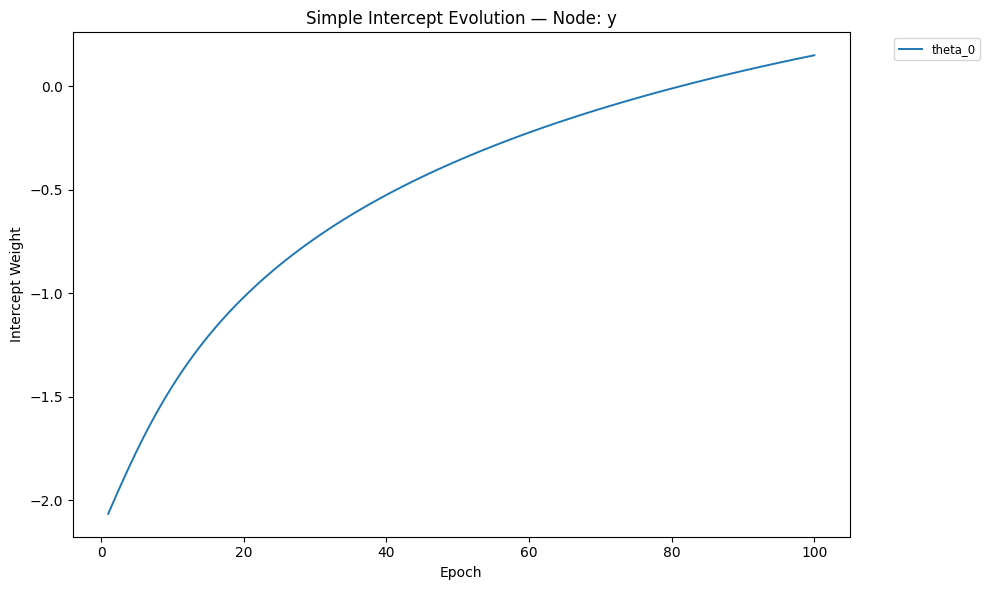

In [14]:
td_model.plot_simple_intercepts()

In [ ]:
td_model.show_samples_vs_true(train_df)

In [ ]:
# td_model.load_or_compute_minmax(use_existing=True)
# rsamples, latents = td_model.sample(use_initial_weights_for_sampling=True)

[INFO] Loaded existing minmax dict from /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/min_max_scaling.json
[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Deleting all previously sampled data.
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/y/sampling

----*----------*-------------*--------Sample Node: x ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x from standard logistic distribution
[INFO] Using initial weights for sampling for node 'x'
[WARNING] target_col 'x' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Chandrupatla root finding ->  iterations::  89%|████████▉ | 89/100 [00:02<00:00, 41.47it/s]


KeyboardInterrupt: 

In [15]:
rsamples, latents = td_model.sample()

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Deleting all previously sampled data.
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/y/sampling

----*----------*-------------*--------Sample Node: x ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x from standard logistic distribution
[INFO] Loaded best model weights for node 'x' from /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/x/best_model.pt
[WARNING] target_col 'x' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 44.11it/s]

[INFO] Completed sampling for node 'x'

----*----------*-------------*--------Sample Node: y ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node y from standard logistic distribution
[INFO] Loaded best model weights for node 'y' from /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/y/best_model.pt
[WARNING] target_col 'y' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Completed sampling for node 'y'
[INFO] DAG sampling completed successfully for all nodes.


[INFO] Loaded training/validation histories for 2 nodes.


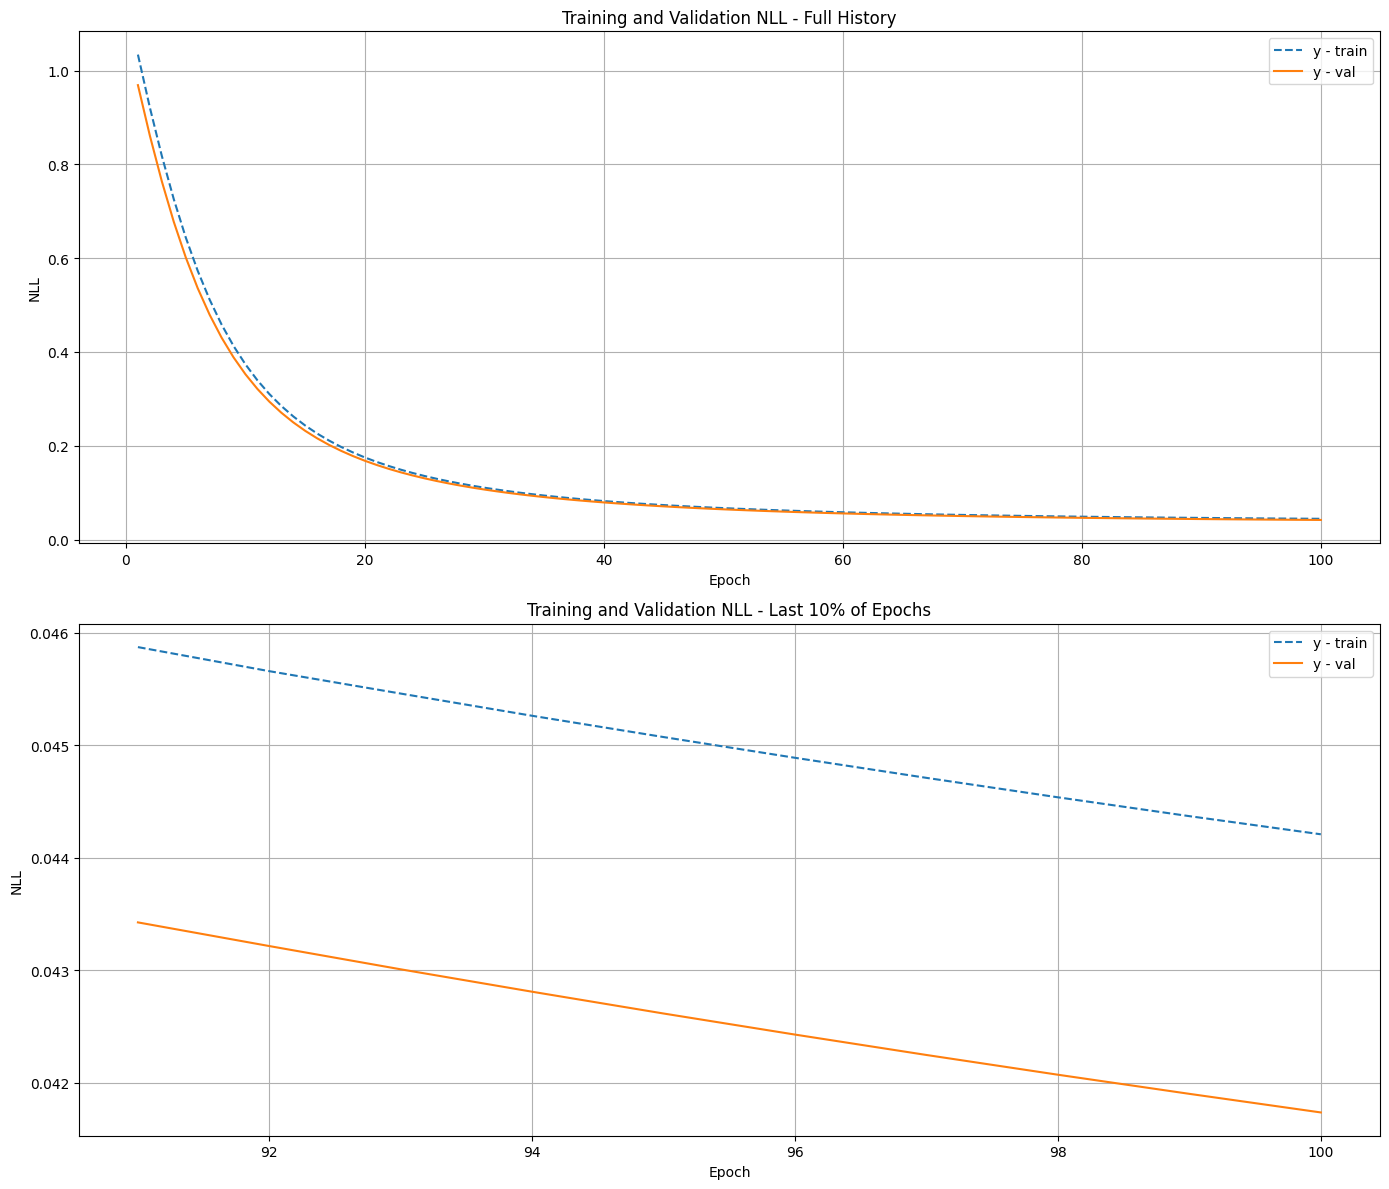

In [18]:
td_model.plot_loss_history('y')

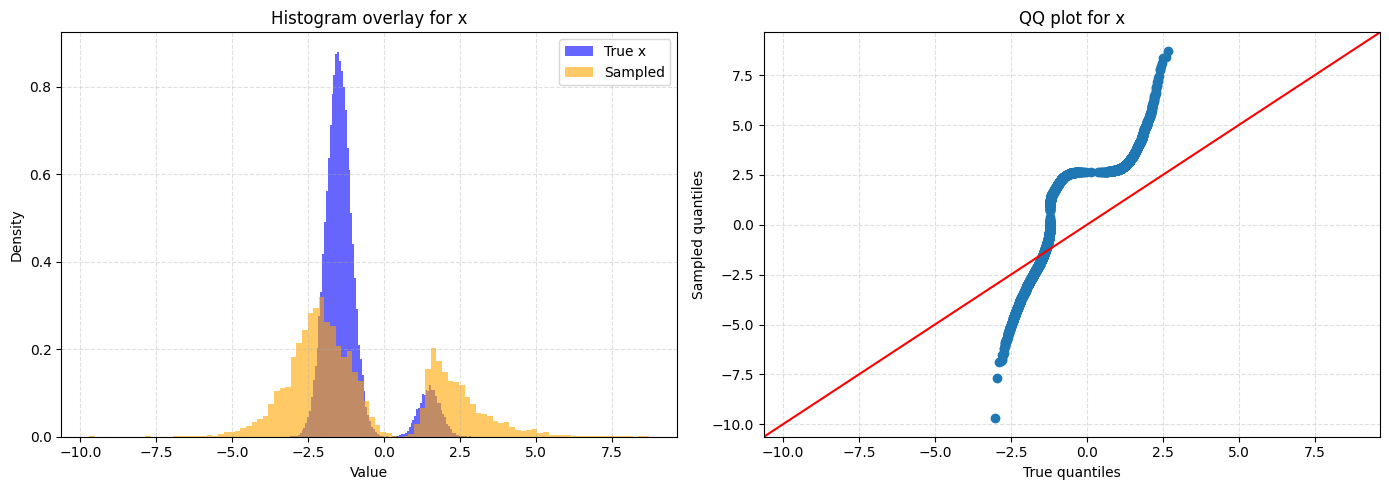

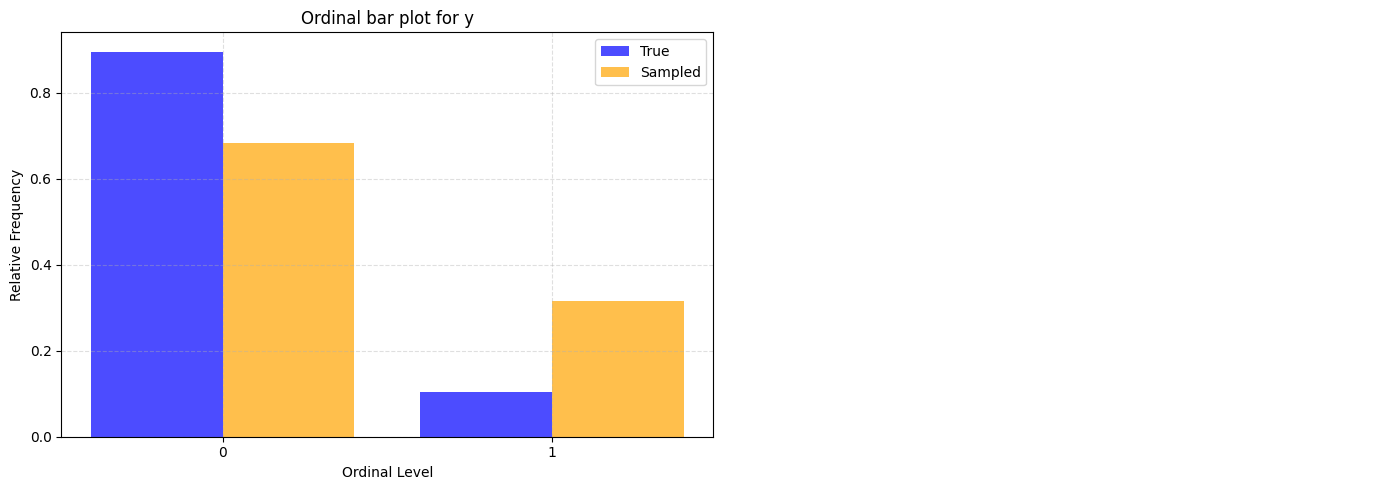

In [19]:
td_model.show_samples_vs_true(train_df)
